# Ex5_4 Projection algorithm

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Find the projection of $x$ onto the unit simplex in $\mathbb{R}^2$:     
$$S = \{x=(x_1,x_2) | x_1 + x_2 = 1, x_1 >=0 , x_2 \geq 0\}$$ 
 We seek for an iterative solution using the **Alternating projection method** or **Dykstra's projection algorithm**.

The set $S$ can be described as the intersection of the following sets $C$ and $D$: 
$$C = \{x=(x_1,x_2) | x_1^2 + x_2^2 <= 1\}$$
$$D = \{x=(x_1,x_2) | x_1 + x_2 = 1\}$$

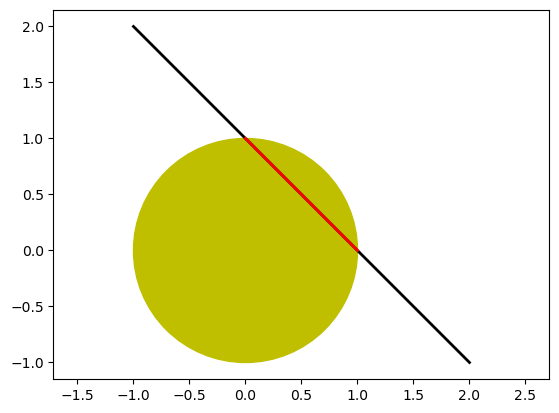

In [10]:
# draw a part of the set D
fig, ax = plt.subplots()
plt.plot([2,-1],[-1,2],color=(0,0,0,1),linewidth=2);
# draw the set C

circle1 = plt.Circle((0, 0), 1, color='y')
ax.add_patch(circle1)
# draw the intersection of set C and set D
plt.plot([1,0],[0,1],color='red',linewidth=2);
plt.axis('equal')
plt.show()

## Alternation projection method
1. Perform the update step of the Alternating Projection Method. 
2. Denote the points on $C$ by $y$ and the points on $D$ by $x$. 
3. Append $y$ and $x$ to the list 'seq'. 
4. Implement an appropriate breaking condition. 
5. Define an appropriate residual and break the loop if **res<tol**.

In [11]:
def POCS(x0, tol, maxiter, check):
    # Initialization
    x = x0.copy()
    y = x.copy()
    seq = [x0]  # Store the sequence of points
    
    for iter in range(maxiter):
        # Projection onto D: x1 + x2 = 1
        x = y + (1 - np.sum(y)) / 2 * np.array([1, 1])
        seq.append(x)
        
        # Projection onto C: x1^2 + x2^2 <= 1
        norm_x = np.linalg.norm(x)
        if norm_x > 1:
            y = x / norm_x  # Project onto the unit circle
        else:
            y = x  # Already inside the unit circle
        seq.append(y)
        
        # Compute residual
        res = np.linalg.norm(x - y)**2
        
        # Breaking condition
        if res < tol:
            break
        
        # Provide some information
        if iter % check == 0:
            print(f"Iter: {iter}, res: {res:.6f}")
    
    return seq

## Dykstra's projection method
 1. Perform the update step of the Dykstra's  Projection Method. 
 2. Denote the points on $C$ by $y$ and the points on $D$ by $x$.       
 3. Append $y$ and $x$ to the list **'seq'**.
 4. Implement an appropriate **breaking condition**.  
 5. Define an appropriate residual and break the loop if **res<tol**.



In [12]:
# Define the Dykstra function
def Dykstra(x0, tol, maxiter, check):
    x = x0.copy()
    y = x.copy()
    p = np.zeros_like(x)  # Correction term for C
    q = np.zeros_like(x)  # Correction term for D
    seq = [x0]  # Store the sequence of points
    
    for iter in range(maxiter):
        # Projection onto D with correction
        x = y + (1 - np.sum(y + q)) / 2 * np.array([1, 1])
        q = x - (y + q)
        seq.append(x)
        
        # Projection onto C with correction
        norm_x = np.linalg.norm(x + p)
        if norm_x > 1:
            y = (x + p) / norm_x  # Project onto the unit circle
        else:
            y = x + p  # Already inside the unit circle
        p = y - (x + p)
        seq.append(y)
        
        # Compute residual
        res = np.linalg.norm(x - y)**2
        
        # Breaking condition
        if res < tol:
            break
        
        # Provide some information
        if iter % check == 0:
            print(f"Dykstra Iter: {iter}, res: {res:.6f}")
    
    return seq

In [13]:
### Run the algorithms ###
x0 = x0 = np.array([1.5,-1.5]); #np.array([-0.5,-1.5]);

tol = 1e-10;
maxiter = 10;
check = 1;

In [14]:
# run the POCS algorithm (Alternating Projection Method)
seq_POCS = POCS(x0, tol, maxiter, check);
arr_POCS = np.vstack(seq_POCS).T;

# run Dykstra Projection Algorithm
seq_Dykstra = Dykstra(x0, tol, maxiter, check);
arr_Dykstra = np.vstack(seq_Dykstra).T;

Iter: 0, res: 1.527864
Iter: 1, res: 0.033568
Iter: 2, res: 0.004767
Iter: 3, res: 0.000947
Iter: 4, res: 0.000213
Iter: 5, res: 0.000051
Iter: 6, res: 0.000012
Iter: 7, res: 0.000003
Iter: 8, res: 0.000001
Iter: 9, res: 0.000000
Dykstra Iter: 0, res: 1.527864
Dykstra Iter: 1, res: 1.527864
Dykstra Iter: 2, res: 0.554836
Dykstra Iter: 3, res: 2.080631
Dykstra Iter: 4, res: 39.451593
Dykstra Iter: 5, res: 172.864935
Dykstra Iter: 6, res: 882.674262
Dykstra Iter: 7, res: 3600.654652
Dykstra Iter: 8, res: 15233.761212
Dykstra Iter: 9, res: 61224.591044


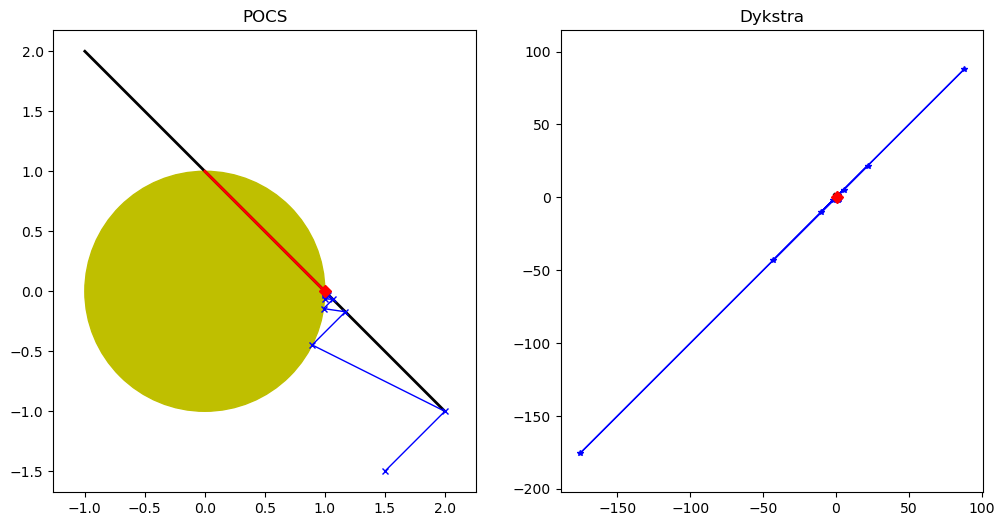

In [15]:
### visualize the result:
#fig= plt.figure(figsize=(12,6));

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12, 6)
#plt.figure(figsize=(12,6))
#plt.subplot(1,2,1);
#plt.axis('square')

#plt.axis('equal')
ax[0].axis('equal')
# draw the set C
circle1 = plt.Circle((0, 0), 1, color='y')
ax[0].add_patch(circle1)

# draw a part of the set D
ax[0].plot([2,-1],[-1,2],color=(0,0,0,1),linewidth=2);
#plt.plot([2,-1],[-1,2],color=(0,0,0,1),linewidth=2);
# draw the boundary of the set C
#an = np.linspace(0, 2*np.pi, 100)#an = np.linspace(0, 2*np.pi, 100)
#plt.plot(np.cos(an), np.sin(an),color=(0,0,0,1),linewidth=1);
#plt.plot(np.cos(an), np.sin(an),color=(1,1,0,1),linewidth=1);

# visualize iterates of POCS
ax[0].plot(arr_POCS[0,:], arr_POCS[1,:], '-x', color=(0,0,1,1),linewidth=1,markersize=4);
#plt.plot(arr_POCS[0,:], arr_POCS[1,:], '-x', color=(0,0,1,1),linewidth=1,markersize=4);

#ax[0].plot(arr_POCS[0,-1], arr_POCS[1,-1], '-x', color=(0,0,1,1),linewidth=2,markersize=8);
#plt.plot(arr_POCS[0,-1], arr_POCS[1,-1], '-x', color=(0,0,1,1),linewidth=2,markersize=8);

# draw the intersection of set C and set D
ax[0].plot([1,0],[0,1],color='red',linewidth=2);
#plt.plot([1,0],[0,1],color='red',linewidth=2);
ax[0].plot(1,0,color='red',marker='D',linewidth=2);
#plt.plot(1,0,color='red',marker='D',linewidth=2);
ax[0].set_title('POCS')
#plt.title("POCS");


#plt.subplot(1,2,2);
ax[1].axis('equal')
# draw a part of the set D
ax[1].plot([2,-1],[-1,2],color=(0,0,0,1),linewidth=2);
#plt.plot([2,-1],[-1,2],color=(0,0,0,1),linewidth=2);
# draw the set C
circle2 = plt.Circle((0, 0), 1, color='y')
ax[1].add_patch(circle2)

# draw the boundary of the set C
#an = np.linspace(0, 2*np.pi, 100)
#plt.plot(np.cos(an), np.sin(an),color=(1,1,0,1),linewidth=1);
# visualize iterates of Dykstra's Algorithm
ax[1].plot(arr_Dykstra[0,:], arr_Dykstra[1,:], '-*', color=(0,0,1,1),linewidth=1,markersize=4);
#plt.plot(arr_Dykstra[0,:], arr_Dykstra[1,:], '-*', color=(0,0,1,1),linewidth=1,markersize=4);

#plt.plot(arr_Dykstra[0,-1], arr_Dykstra[1,-1], '*', color=(0,0,1,1),linewidth=2,markersize=8);
# draw the intersection of set C and set D
ax[1].plot([1,0],[0,1],color='red',linewidth=2)
#plt.plot([1,0],[0,1],color='red',linewidth=2);
ax[1].plot(1,0,color='red',marker='D',linewidth=2);
#plt.plot(1,0,color='red',marker='D',linewidth=2);
ax[1].set_title("Dykstra");

plt.savefig('POCSvsDykstra.pdf',bbox_inches='tight', facecolor='white')

# show result

plt.show();
